# Visualizing the effect of reopening policies on COVID-19 total case count by state

Looking at the state-level data for Arizona, California, Florida, Massachusetts, Rhode Island, and Texas. Data updated July 17, 2020.

### Sources
- [AZ BIG Media](https://azbigmedia.com/business/covid-19-cases-in-arizona-approach-140000-deaths-surpass-2500/)
- [COVID Tracking](covidtracking.com)

In [24]:
# importing necessary libraries and packages

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

## Cleaning and converting the data

Most of the data is fairly clean and ready to use. However, some null values need to be replaced and we need to convert the date column to a datetime class for it to work with matplotlib. For visualization purposes, we will also need to find COVID-19 cases per 100,000 people.

### Arizona

In [25]:
# reading in the csv and first look

az_cases = pd.read_csv('az_covid_data.csv')

az_cases.head()

,Unnamed: 0,New cases reported,Total cases reported
0,"Sunday, Mar. 1, 2020",NaN,1
1,"Monday, Mar. 2, 2020",NaN,1
2,"Tuesday, Mar. 3, 2020",1.0,2
3,"Wednesday, Mar. 4, 2020",NaN,2
4,"Thursday, Mar. 5, 2020",NaN,2


In [26]:
# renaming columns

az_cases.rename(columns = {
    'Unnamed: 0': 'date',
    'New cases reported': 'cases_new',
    'Total cases reported': 'cases_total'
}, inplace=True)

The null values are all actually new_case values of zero, as noted by the data source. We can see some of them from January--while Arizona's first reported case was on January 27, no new cases were reported until March 3.

In [27]:
az_cases.isnull().sum()

date           0
cases_new      7
cases_total    0
dtype: int64

In [28]:
# replacing  40 null values with zero

az_cases['cases_new'].fillna(0, inplace=True)
az_cases.head()

,date,cases_new,cases_total
0,"Sunday, Mar. 1, 2020",0.0,1
1,"Monday, Mar. 2, 2020",0.0,1
2,"Tuesday, Mar. 3, 2020",1.0,2
3,"Wednesday, Mar. 4, 2020",0.0,2
4,"Thursday, Mar. 5, 2020",0.0,2


In [29]:
# convert date column to datetime class

az_datetime = pd.to_datetime(az_cases['date'], infer_datetime_format=True, exact=False)

az_datetime

0     2020-03-01
1     2020-03-02
2     2020-03-03
3     2020-03-04
4     2020-03-05
         ...    
134   2020-07-13
135   2020-07-14
136   2020-07-15
137   2020-07-16
138   2020-07-17
Name: date, Length: 139, dtype: datetime64[ns]

In [30]:
az_cases['date'] = az_datetime

In [31]:
az_cases['cases_pop'] = (az_cases['cases_total']/7378490)*100000

az_cases.head() 

,date,cases_new,cases_total,cases_pop
0,2020-03-01,0.0,1,0.013553
1,2020-03-02,0.0,1,0.013553
2,2020-03-03,1.0,2,0.027106
3,2020-03-04,0.0,2,0.027106
4,2020-03-05,0.0,2,0.027106


### California

In [32]:
ca_cases = pd.read_csv('ca_covid_data.csv')

ca_cases.head()

,date,state,positive
0,20200717,CA,366164
1,20200716,CA,356178
2,20200715,CA,347634
3,20200714,CA,336508
4,20200713,CA,329162


In [33]:
del ca_cases['state']
ca_cases.rename(columns={
    'positive': 'cases_total'
}, inplace=True);

ca_cases.isnull().sum()

date           0
cases_total    0
dtype: int64

In [34]:
ca_cases['date'] = pd.to_datetime(ca_cases['date'], format='%Y%m%d', exact=False)

ca_cases['cases_pop'] = (ca_cases['cases_total']/39937500)*100000
ca_cases.head() 

,date,cases_total,cases_pop
0,2020-07-17,366164,916.842567
1,2020-07-16,356178,891.838498
2,2020-07-15,347634,870.445070
3,2020-07-14,336508,842.586541
4,2020-07-13,329162,824.192801


Note that California's data is listed backwards chronologically. This will not change our plot.

### Florida

In [35]:
fl_cases = pd.read_csv('fl_covid_data.csv')
fl_cases.head()

,date,state,positive,negative
0,20200717,FL,327241,2553527
1,20200716,FL,315775,2499843
2,20200715,FL,301810,2434143
3,20200714,FL,291629,2393614
4,20200713,FL,282435,2357139


Since the CA, FL, TX, RI, and MI data are coming from the same place, they all have similar formats. I am defining a function to clean the data faster: `clean_covid()`.

In [36]:
del fl_cases['negative']

def clean_covid(df, pop):
    del df['state']
    df.rename(columns={
    'positive': 'cases_total'
    }, inplace=True);

    df['date'] = pd.to_datetime(df['date'], format='%Y%m%d', exact=False)

    df['cases_pop'] = (df['cases_total']/pop)*100000
    return df.head(2)

clean_covid(fl_cases, 21993000)

,date,cases_total,cases_pop
0,2020-07-17,327241,1487.932524
1,2020-07-16,315775,1435.797754


### Massachusetts

In [37]:
ma_cases = pd.read_csv('ma_covid_data.csv')
ma_cases.head()

,date,state,positive
0,20200717,MA,112879
1,20200716,MA,112581
2,20200715,MA,112347
3,20200714,MA,112130
4,20200713,MA,111827


In [38]:
clean_covid(ma_cases, 6976600)

,date,cases_total,cases_pop
0,2020-07-17,112879,1617.965771
1,2020-07-16,112581,1613.694350


### Rhode Island

In [39]:
ri_cases = pd.read_csv('ri_covid_data.csv')
ri_cases.head()

,date,state,positive
0,20200717,RI,17793
1,20200716,RI,17711
2,20200715,RI,17640
3,20200714,RI,17588
4,20200713,RI,17487


In [40]:
clean_covid(ri_cases, 1056160)

,date,cases_total,cases_pop
0,2020-07-17,17793,1684.687926
1,2020-07-16,17711,1676.923951


### Texas

In [41]:
tx_cases = pd.read_csv('tx_covid_data.csv')
tx_cases.head()

,date,state,positive
0,20200717,TX,307572
1,20200716,TX,292656
2,20200715,TX,282365
3,20200714,TX,275058
4,20200713,TX,264313


In [42]:
clean_covid(tx_cases, 29472300)

,date,cases_total,cases_pop
0,2020-07-17,307572,1043.596869
1,2020-07-16,292656,992.986635


## Visualizing the Data

We want to use a line graph that shows Cases per 100k vs. Date for each target state. Later, we will add markers for various policy implemented by each state.

For reference, here is our target states' policy on reopening. Note that these represent start dates of two rough "phases" in the reopening process. For the comprehensive list of dates, see `'state_policies.csv'`.

- **Arizona** - (5/8) Begin to reopen businesses, (5/16) Reopen non-essential
- **California** - (5/8) Begin to reopen businesses
- **Florida** - (5/18) Begin to reopen businesses, (5/18) Reopen non-essential
- **Massachusetts** - (5/18) Begin to reopen businesses, (7/13) Reopen non-essential
- **Rhode Island** - (5/9) Begin to reopen businesses, (6/1) Reopen non-essential
- **Texas** - (5/1) Begin to reopen businesses, (5/18) Reopen non-essential


In [43]:
# creating a dataframe for the state policies info

ph_data = {
    'dateph1': [datetime(2020, 5, 8), datetime(2020, 5, 8), datetime(2020, 5, 18), datetime(2020, 5, 18), datetime(2020, 5, 9), datetime(2020, 5, 1)],
    'caseph1': [142.65791510187043, 156.5245696400626, 211.16718956031465, 1247.7711206031593, 1081.9383426753523, 99.17447908714284],
    'dateph2': [datetime(2020, 5, 16), datetime(2020, 5, 8), datetime(2020, 5, 18), datetime(2020, 7, 13), datetime(2020, 6, 1), datetime(2020, 5, 18)],
    'caseph2': [192.04471375579556, 156.5245696400626, 211.16718956031465, 1602.8867929937219, 1428.4767459475836, 165.21615211571543]
}

ph_policies = pd.DataFrame(ph_data, index=['Arizona', 'California', 'Florida', 'Massachusetts', 'Rhode Island', 'Texas'])
ph_policies.head()

,dateph1,caseph1,dateph2,caseph2
Arizona,2020-05-08,142.657915,2020-05-16,192.044714
California,2020-05-08,156.524570,2020-05-08,156.524570
Florida,2020-05-18,211.167190,2020-05-18,211.167190
Massachusetts,2020-05-18,1247.771121,2020-07-13,1602.886793
Rhode Island,2020-05-09,1081.938343,2020-06-01,1428.476746


Text(0.5, 1.0, 'Total COVID-19 Cases per 100k vs. Date for 6 U.S. States')

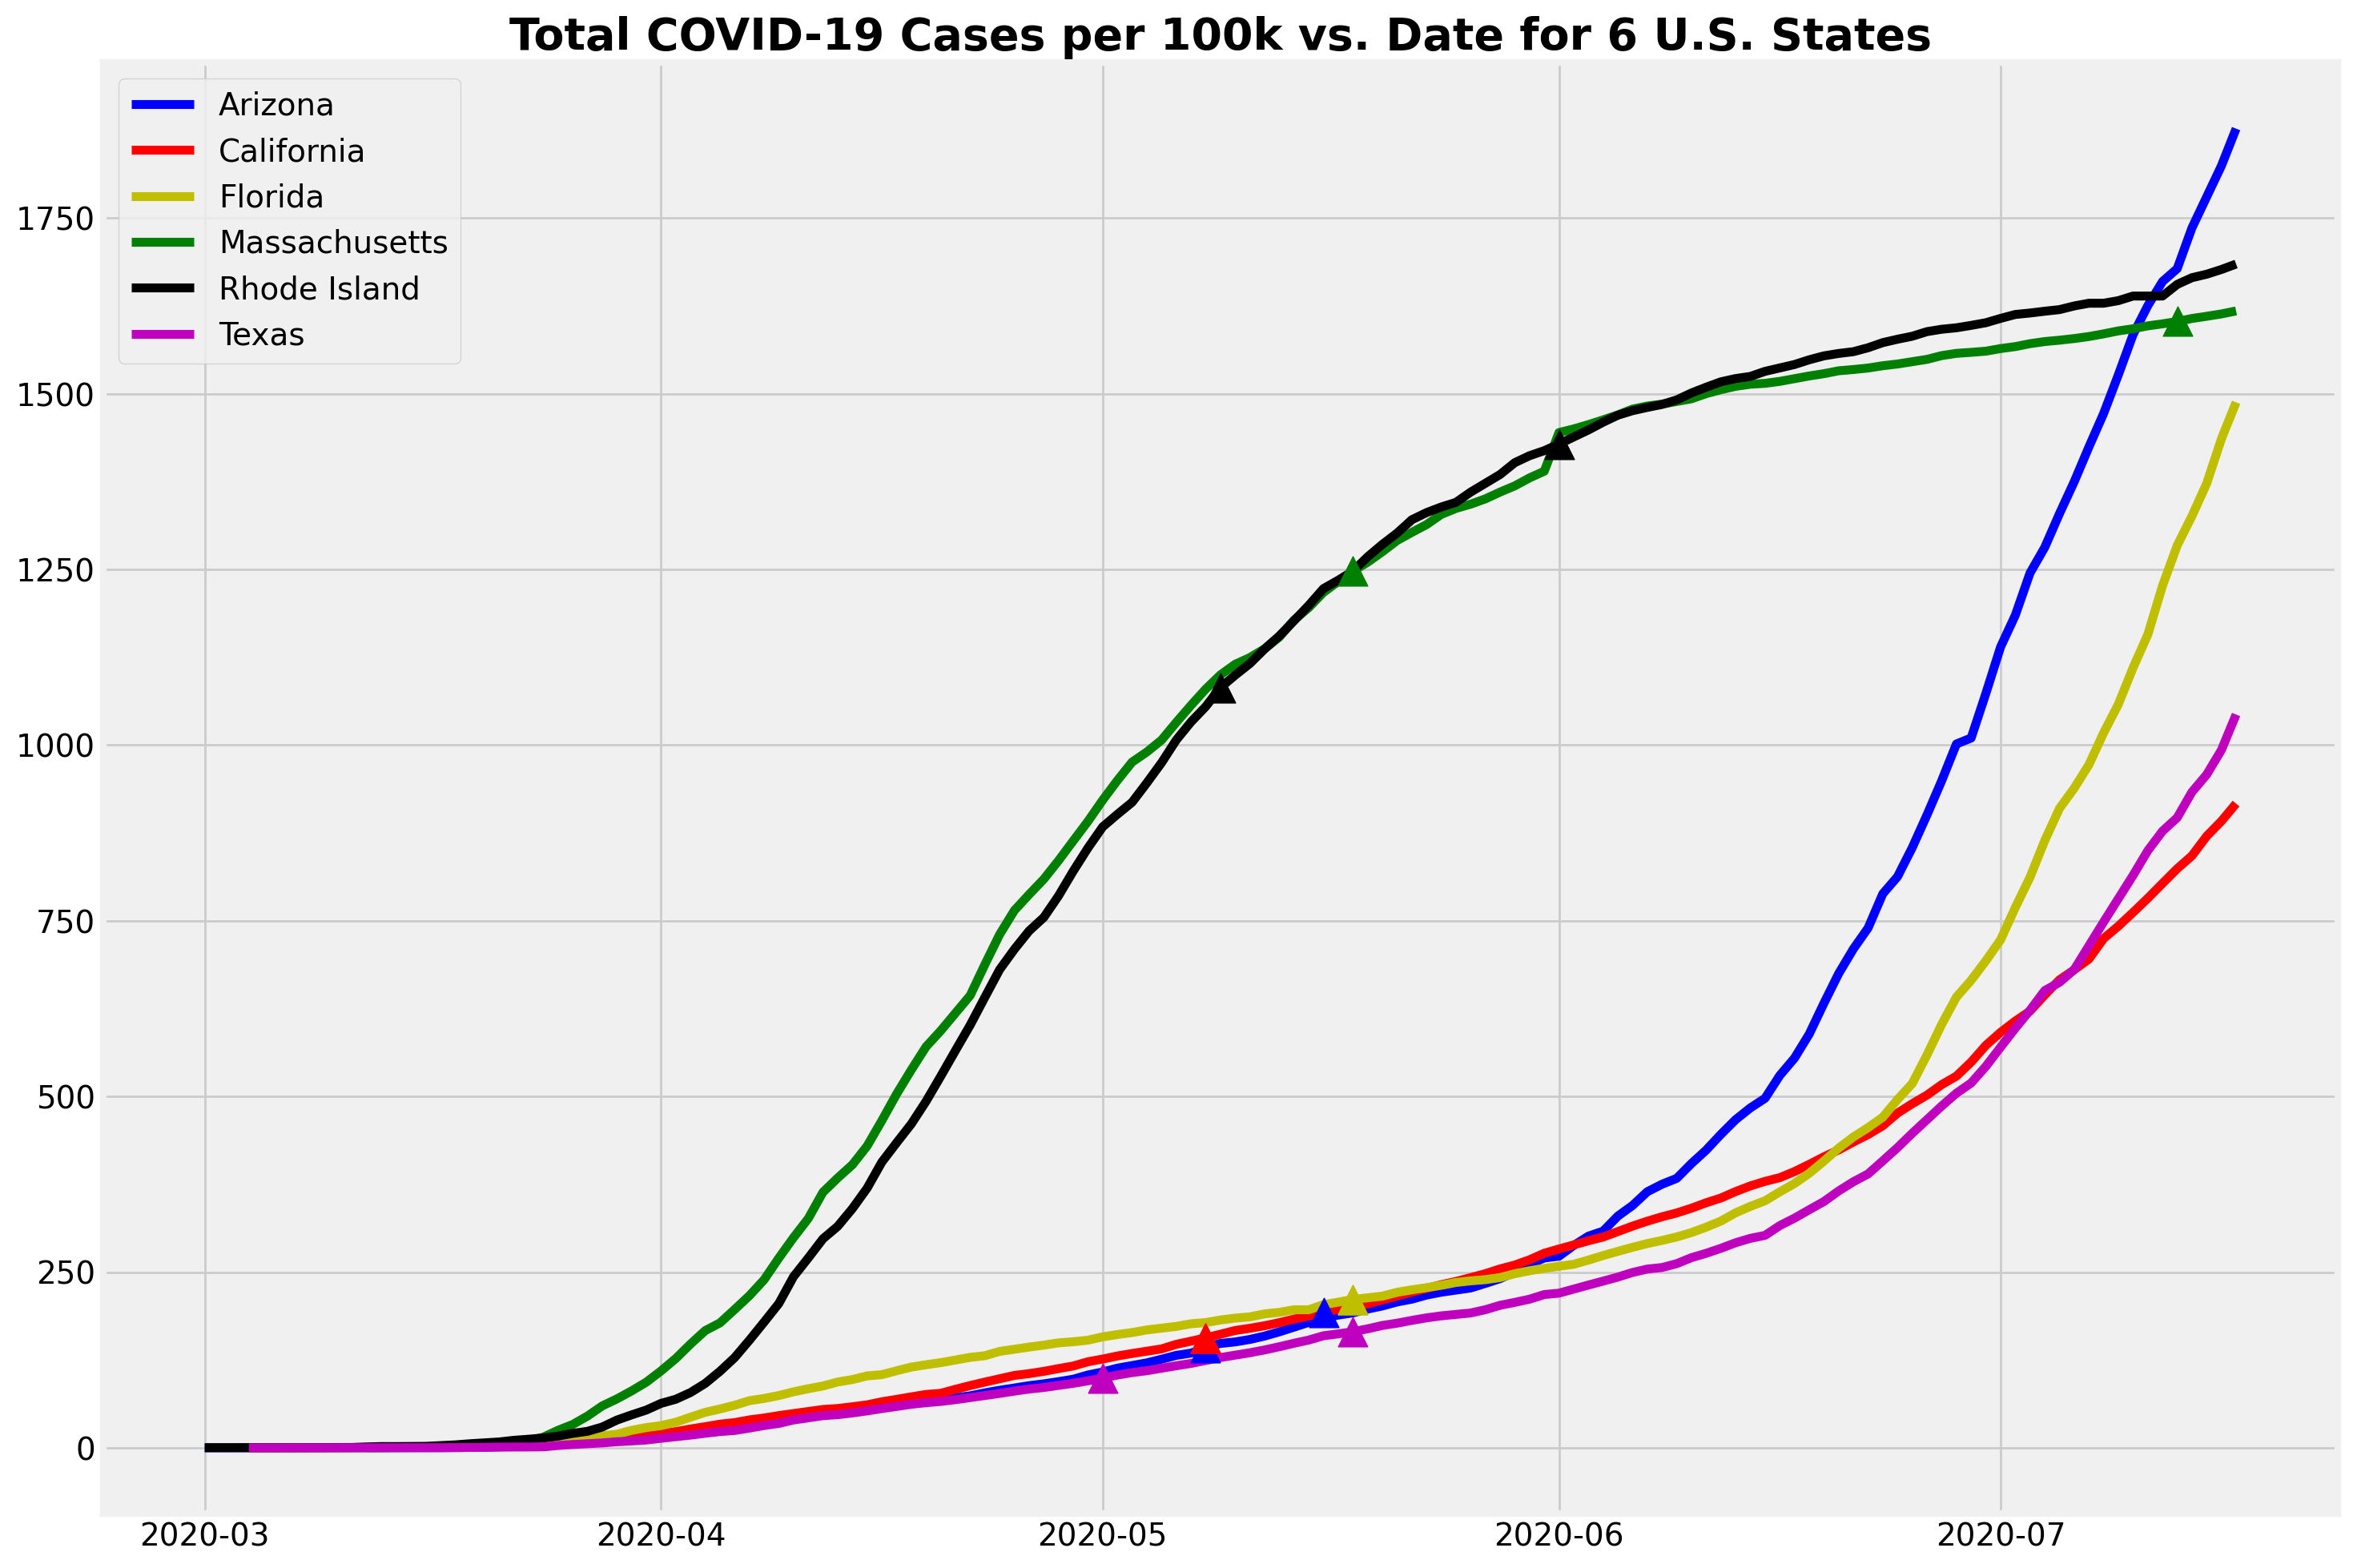

In [51]:
plt.figure(num=None, figsize=(18, 12), dpi=200, facecolor='w', edgecolor='w')
from matplotlib import style
style.use('fivethirtyeight')

# function to plot each state's cases per 100k
def case_plot(df, name, col):
    return plt.plot(df['date'],df['cases_pop'], label=name, zorder=2, color=col)

# lists for iteration
state_data = [az_cases, ca_cases, fl_cases, ma_cases, ri_cases, tx_cases]
states = ['Arizona', 'California', 'Florida', 'Massachusetts', 'Rhode Island', 'Texas']
states_color = ['b', 'r', 'y', 'g', 'k', 'm']

# plotting...
for index, state in enumerate(states):
    plt.scatter(ph_policies.at[state, 'dateph1'], ph_policies.at[state, 'caseph1'], marker = '^', s=175, color=states_color[index], zorder=3)
    plt.scatter(ph_policies.at[state, 'dateph2'], ph_policies.at[state, 'caseph2'], marker = '^', s=175, color=states_color[index], zorder=3)

for index, state in enumerate(state_data):
    case_plot(state, states[index], col=states_color[index])
plt.legend()
plt.title('Total COVID-19 Cases per 100k vs. Date for 6 U.S. States', fontsize = 20, fontweight ='bold')


Where each point represents one phase, and each color is one state. Note that while California (red) has yet to begin phase 2, Florida started both phases on the same day.

## Possible ways to improve the visualization (in progress)

Below, I've listed some code that could be used to improve our visualization or code above. While it is not complete, I've started to show how we can use the data directly from `'state_policies.csv'` by cleaning up the data and converting date strings into datetime. Later, we can use the `df.loc[]` method to find data for only our target states, and `df.loc[state_df[col] == date]` to match the date to the case count, so we can then plot that particular point.

Some other ideas:
- color-coding policies by group (business reopening, recreation reopening, etc.)

In [45]:
state_policies = pd.read_csv('state_policies.csv', index_col=0)
state_policies.head()

,State Abbreviation,State FIPS Code,End/relax stay at home/shelter in place,Began to reopen businesses statewide,Reopen restaurants,Initially reopen restaurants for outdoor dining only,Reopened gyms,Reopened movie theaters,Reopened hair salons/barber shops,Reopen non-essential construction,Reopen Religious gatherings,Reopen non-essential retail,Reopen bars,Reopen Childcare,Resumed elective medical procedures
State,,,,,,,,,,,,,,,
Alabama,AL,1.0,4/30/2020,4/30/2020,5/11/2020,0.0,5/11/2020,5/22/2020,5/11/2020,0,5/11/2020,4/30/2020,5/11/2020,5/23/2020,4/30/2020
Alaska,AK,2.0,4/24/2020,4/24/2020,4/24/2020,0.0,5/8/2020,5/8/2020,4/24/2020,0,4/24/2020,4/22/2020,5/8/2020,0,4/20/2020
Arizona,AZ,4.0,5/16/2020,5/8/2020,5/11/2020,0.0,5/13/2020,5/16/2020,5/8/2020,0,0,5/8/2020,5/16/2020,0,5/1/2020
Arkansas,AR,5.0,0,5/4/2020,5/11/2020,0.0,5/4/2020,5/18/2020,5/6/2020,0,5/4/2020,5/18/2020,5/26/2020,0,4/27/2020
California,CA,6.0,0,5/8/2020,0,0.0,0,0,0,4/28/2020,6/12/2020,5/8/2020,0,0,4/22/2020


In [46]:
# converting nonzero date values to datetime, and zero values to null

date_cols = ['End/relax stay at home/shelter in place',
'Began to reopen businesses statewide', 'Reopen restaurants',
'Initially reopen restaurants for outdoor dining only', 'Reopened gyms',
'Reopened movie theaters', 'Reopened hair salons/barber shops',
'Reopen non-essential construction', 'Reopen Religious gatherings',
'Reopen non-essential retail', 'Reopen bars', 'Reopen Childcare',
'Resumed elective medical procedures']

for item in date_cols:
    tar_col = state_policies[item]

    state_policies[item] = pd.to_datetime(tar_col, format='%m/%d/%Y', exact=False, errors='coerce')

state_policies.head()

,State Abbreviation,State FIPS Code,End/relax stay at home/shelter in place,Began to reopen businesses statewide,Reopen restaurants,Initially reopen restaurants for outdoor dining only,Reopened gyms,Reopened movie theaters,Reopened hair salons/barber shops,Reopen non-essential construction,Reopen Religious gatherings,Reopen non-essential retail,Reopen bars,Reopen Childcare,Resumed elective medical procedures
State,,,,,,,,,,,,,,,
Alabama,AL,1.0,2020-04-30,2020-04-30,2020-05-11,NaT,2020-05-11,2020-05-22,2020-05-11,NaT,2020-05-11,2020-04-30,2020-05-11,2020-05-23,2020-04-30
Alaska,AK,2.0,2020-04-24,2020-04-24,2020-04-24,NaT,2020-05-08,2020-05-08,2020-04-24,NaT,2020-04-24,2020-04-22,2020-05-08,NaT,2020-04-20
Arizona,AZ,4.0,2020-05-16,2020-05-08,2020-05-11,NaT,2020-05-13,2020-05-16,2020-05-08,NaT,NaT,2020-05-08,2020-05-16,NaT,2020-05-01
Arkansas,AR,5.0,NaT,2020-05-04,2020-05-11,NaT,2020-05-04,2020-05-18,2020-05-06,NaT,2020-05-04,2020-05-18,2020-05-26,NaT,2020-04-27
California,CA,6.0,NaT,2020-05-08,NaT,NaT,NaT,NaT,NaT,2020-04-28,2020-06-12,2020-05-08,NaT,NaT,2020-04-22
